In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

https://matplotlib.org/

# The Anscombe Quartet

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

- Anscombe's quartet comprises `four data sets` that have `nearly identical simple descriptive statistics`, 
yet have very different distributions and appear `very different when graphed`. 

- Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. 

- He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

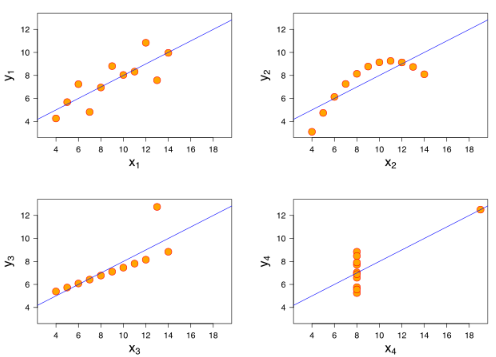

## sns.load_dataset ('anscombe')

Note:
```python
seaborn.load_dataset(name, cache=True, data_home=None, **kws)
```
- Load an example dataset from the online repository (requires internet).
- This function provides quick access to a small number of example datasets that are useful for documenting seaborn
- name : str - Name of the dataset (`name`.csv on https://github.com/mwaskom/seaborn-data).
- You can obtain list of available datasets using :func:`get_dataset_names`

- `sns.get_dataset_names()`: 
['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

### Creating data frame : 'anscombe' - 4 datasets

In [2]:
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [3]:
# Filtering Anscombe dataset I 

# option 1: using 'mask'
mask = df['dataset'] == 'I'
df.loc[mask,:]

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [4]:
# option 2: using ',query'
df.query('dataset == "I" ')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### Same MEAN / same STD , but Different Distribution

In [5]:
df.mean()

x    9.000000
y    7.500682
dtype: float64

In [6]:
df.std()

x    3.198837
y    1.958925
dtype: float64

In [7]:
df.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [8]:
df.groupby('dataset').std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Converting to list to make new dataframe

In [9]:
# Convert the DataFrame to a dictionary
print(df.to_dict(orient='list'))

{'dataset': ['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'II', 'III', 'III', 'III', 'III', 'III', 'III', 'III', 'III', 'III', 'III', 'III', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV'], 'x': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0, 10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0, 10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], 'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68, 9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74, 7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73, 6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}


In [10]:
x1 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]

x3 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]

In [11]:
df = pd.DataFrame({'x1': x1,'y1': y1,
                   'x2': x2,'y2': y2,
                   'x3': x3,'y3': y3,
                   'x4': x4,'y4': y4})
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [12]:
df.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

In [13]:
df.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

### plotting Ansconbe Quartet

In [14]:
import matplotlib.pyplot as plt

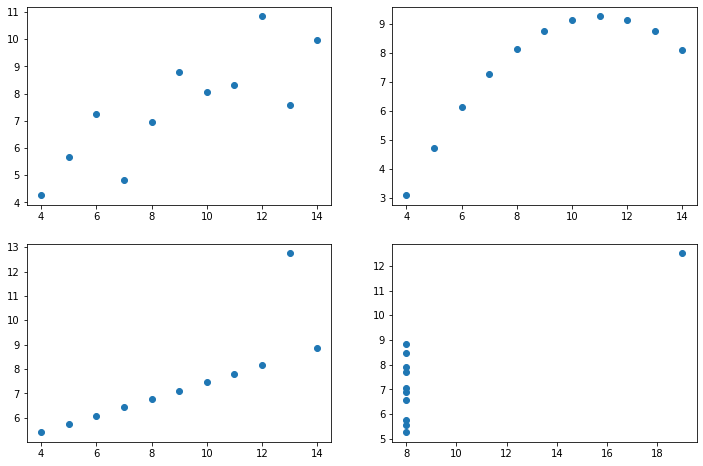

In [15]:
fig, axes = plt.subplots(2,2,figsize=(12,8))

axes[0][0].scatter(df.x1, df.y1)
axes[0][1].scatter(df.x2, df.y2)
axes[1][0].scatter(df.x3, df.y3)
axes[1][1].scatter(df.x4, df.y4)

plt.show()

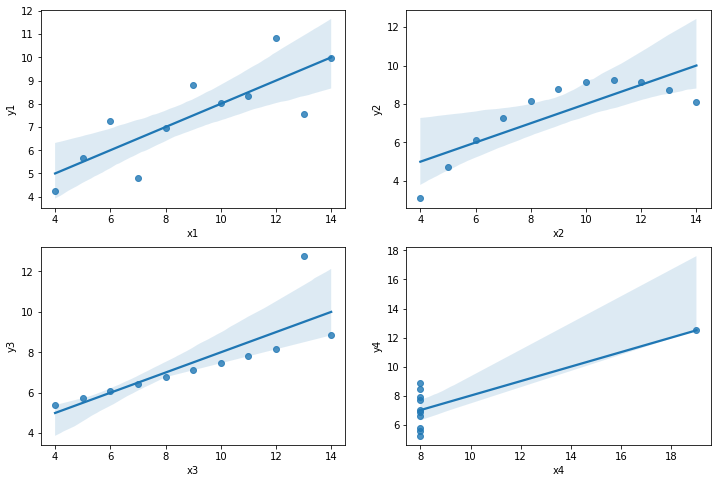

In [80]:
plt.figure(figsize=(12,8)) # OR:  sns.set(rc={'figure.figsize':(12,6)})

plt.subplot(2,2,1)
sns.regplot(df.x1, df.y1)

plt.subplot(2,2,2)
sns.regplot(df.x2, df.y2)

plt.subplot(2,2,3)
sns.regplot(df.x3, df.y3)

plt.subplot(2,2,4)
sns.regplot(df.x4, df.y4)

plt.show()

# The Basics of matplotlib

## Parts of a figure

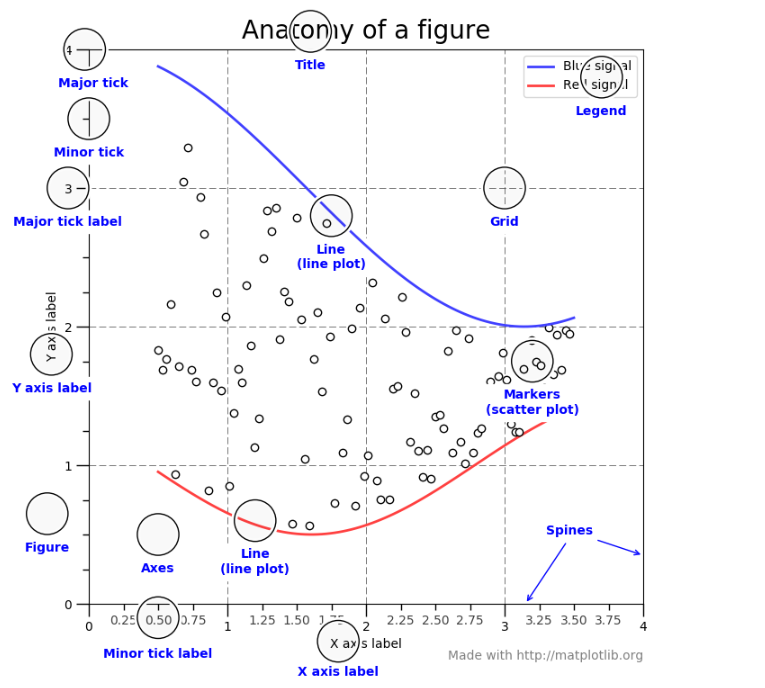

## Terminology

1. **Matplotlib** graphs your data on **`Figures`** 
2. Each **Figure** can contain one ore more **`Axes`**

In [17]:
#!pip install matplotlib --user

## fig, ax = plt.subplots()  &#10144;  tuple (2 elements)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fe228f9788>)

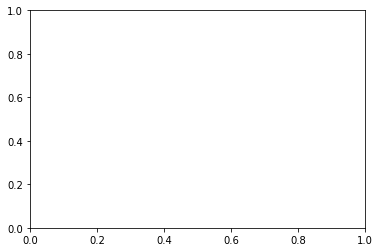

In [18]:
# return a result: the tuple of 2 elements (fig, ax)
plt.subplots()

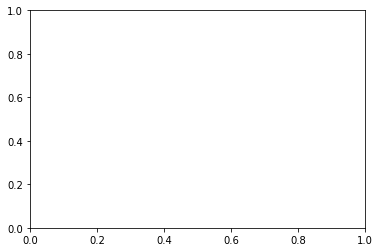

In [19]:
# plt.subplots() assigned with a variable x
x = plt.subplots()

In [20]:
type(x)

tuple

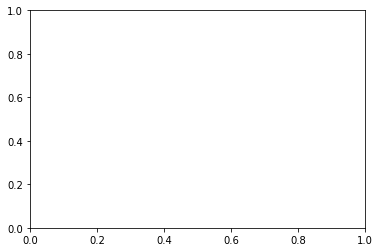

In [21]:
# Return as figure
x[0] 

In [22]:
# Return as ax
x[1] 

In [23]:
a, b = (10, 3)
# a = 10
# b = 3

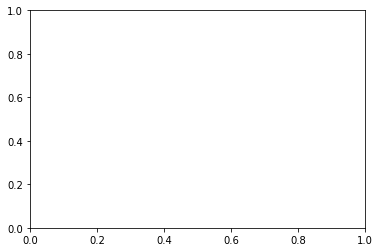

In [24]:
# Create a figure containing a single axes.
fig, ax = plt.subplots()

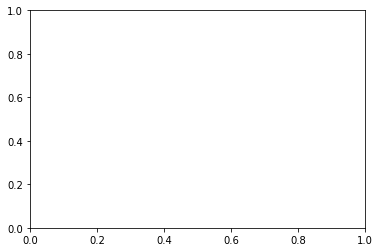

In [25]:
fig

In [26]:
ax

### fig, ax = plt.subplots (nrows, ncols, figsize=( , ))

In [27]:
# Example of creating two rows of images.
# fig, ax = plt.subplots(nrows=2)
# fig, (ax1, ax2) = plt.subplots(nrows=2)

In [28]:
ax.plot()

[]

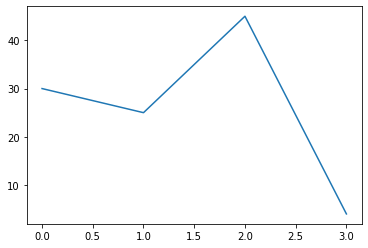

In [29]:
fig, ax = plt.subplots()

ax.plot([30,25,45,4])

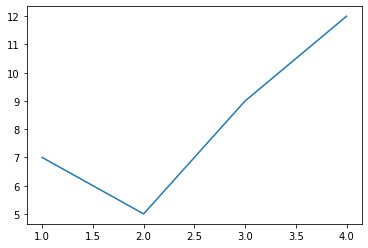

In [30]:
fig, ax = plt.subplots()

# Plot y versus x as lines and/or markers
ax.plot([1,2,3,4], [7,5,9,12])

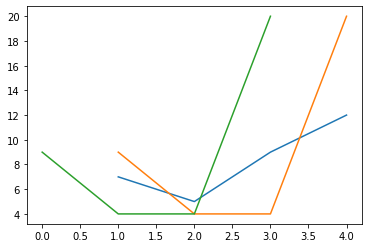

In [31]:
# 3 axes in the same figure
fig, ax = plt.subplots()

ax.plot([1,2,3,4], [7,5,9,12])
ax.plot([1,2,3,4], [9,4,4,20])
ax.plot([9,4,4,20])

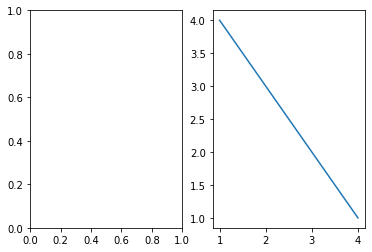

In [32]:
fig, axes = plt.subplots(1, 2)

axes[1].plot([1,2,3,4], [4,3,2,1])

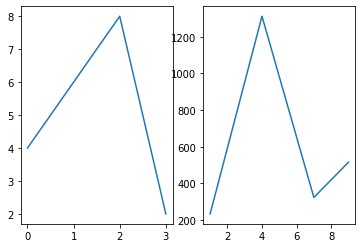

In [33]:
fig, axes = plt.subplots(ncols=2)

axes[0].plot([4,6,8,2])
axes[1].plot([1,4,7,9], [233,1312,323,515])

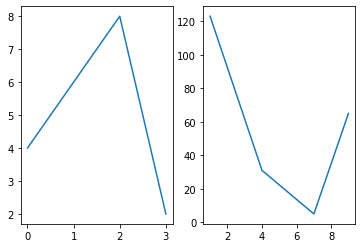

In [34]:
a = [1,4,7,9]
b = [123,31,5,65]

fig, axes = plt.subplots(ncols=2)

axes[0].plot([4,6,8,2])
axes[1].plot(a, b)

In [35]:
axes[1]

---

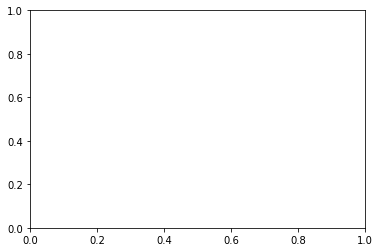

In [36]:
fig, ax = plt.subplots()

In [37]:
ax.plot([1,2,3,4], [7,5,9,12])

In [38]:
ax.plot([1,2,3,4], [33,23,76,14])

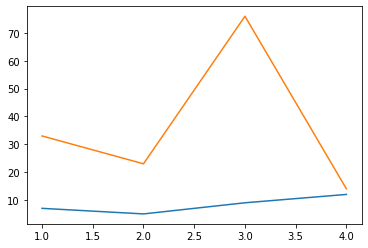

In [39]:
fig

---

In [43]:
x = [1, 4, 7, 9]
y = [120, 37, 10, 60]

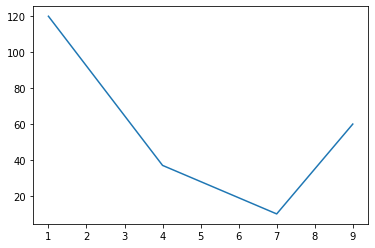

In [46]:
fig, ax = plt.subplots()

ax.plot(x, y)

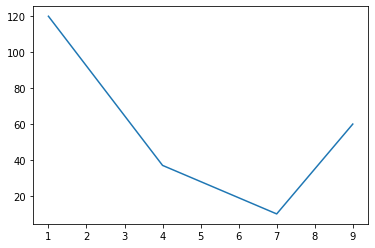

In [47]:
plt.plot(x, y)

### Create a new figure:   plt.figure (figsize=( , )) 

In [48]:
plt.figure(figsize=(12,8)) 

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

### Add figure:  plt.subplot (nrows, ncols, index)

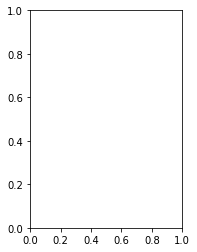

In [49]:
# Add a subplot to the current figure.
plt.subplot(1,2,1)

[]

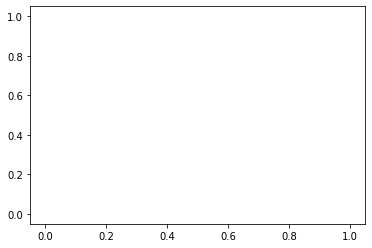

In [50]:
plt.plot()

---

## The pyplot (plt) method.

> The `plt.plot()` method connects the dots by a line, by default.

### plt.plot()

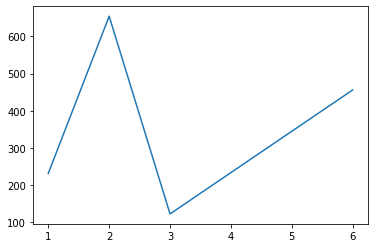

In [51]:
plt.plot([1,2,3,6], [232,654,123,456])

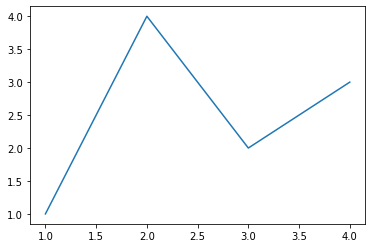

In [52]:
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.plot(x, y)

---

In [53]:
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


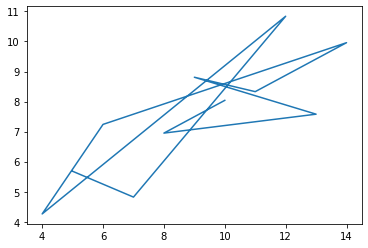

In [59]:
x = df['x1']
y = df['y1']

# Trying to connect to the whole elements with lines - difficult to understand it
plt.plot(x, y)

### plt.scatter(x,y)

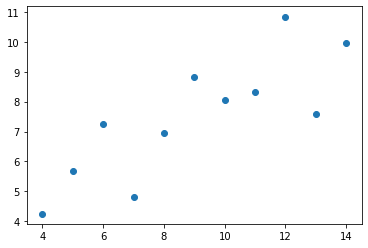

In [55]:
plt.scatter(x, y)

### df.sort_values() - plt.plot ()

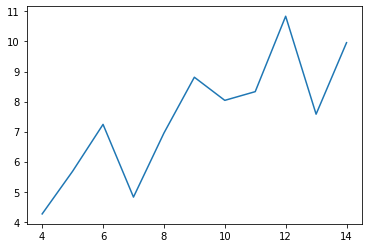

In [60]:
x = df.sort_values(by='x1')['x1']
y = df.sort_values(by='x1')['y1']

plt.plot(x, y)

# Basic Plots

## The `plt` command

We use pyplot to plot a simple straight line.

* The first argument is a list of x coordinates
* The second argument is a list of y coordinates

### Saving figure: plt.savefig('exemplo.png', dpi=300)

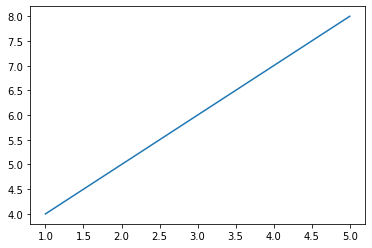

In [65]:
plt.plot([1,2,3,4,5], [4,5,6,7,8])

# Save the current figure
plt.savefig('exemplo.png', dpi=300)

### plt.show() 

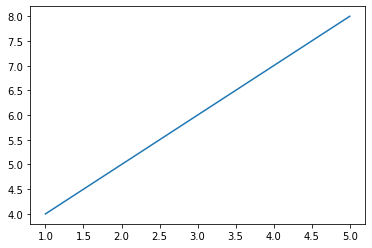

In [70]:
plt.plot([1,2,3,4,5], [4,5,6,7,8])
plt.show()

### plt.grid()

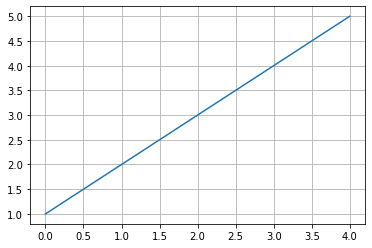

In [67]:
plt.plot([0,1,2,3,4], [1,2,3,4,5])

plt.grid()
plt.show()

---

### plt.xticks() / plt.yticks()

In [68]:
import numpy as np

x1 = np.arange(0,5,.25)
x1

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75])

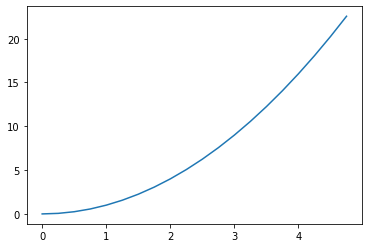

In [69]:
plt.plot(x1, x1**2)

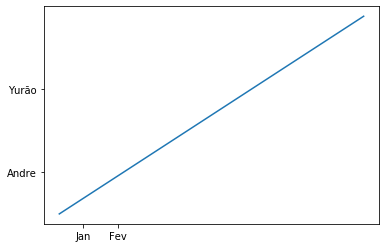

In [72]:
plt.plot(x1, x1)

plt.xticks(ticks=[0.3767, 0.90983], labels=['Jan','Fev'])
plt.yticks(ticks=[1,3], labels=['Andre','Yurão'])

plt.show()

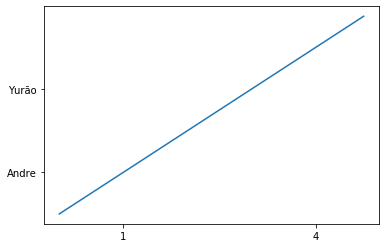

In [73]:
plt.plot(x1, x1)

plt.xticks(ticks=[1,4])
plt.yticks(ticks=[1,3], labels=['Andre','Yurão'])

plt.show()

### plot at the same graph

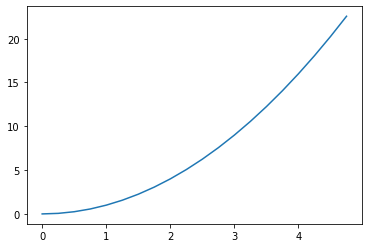

In [74]:
plt.plot(x1, x1**2)

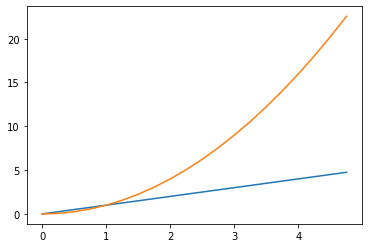

In [75]:
plt.plot(x1, x1)
plt.plot(x1, x1**2)

### plot the graphs separately using  plt.show()

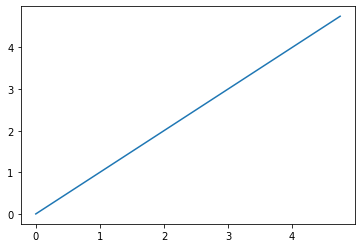

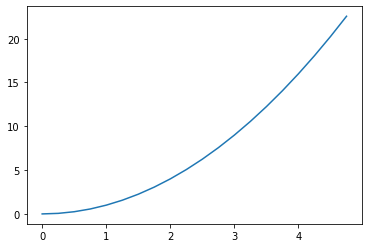

In [82]:
plt.plot(x1, x1)
plt.show()

plt.plot(x1, x1**2)
plt.show()